# Question : Quelles sont les ligues les plus prévisibles ?

But: On cherche à savoir quelle ligue est la plus adaptée pour réaliser des paris sportifs

# Sommaire 

* Quelles ligues présente le plus de cohérence avec les côtes des paris sportifs ?
* Parmis le top des équipes les plus prévisibles, quelles sont les ligues les plus representés ?

# Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy.stats import entropy

# Import jeu de données

In [2]:
conn = sqlite3.connect('data/database.sqlite')

In [3]:
countries = pd.read_sql_query("SELECT * from Country", conn)
match = pd.read_sql_query("SELECT * from Match", conn)
leagues = pd.read_sql_query("SELECT * from League", conn)
team = pd.read_sql_query("SELECT * from Team", conn)

In [4]:
leagues.rename(columns = {'name_x':'country'})
leagues.rename(columns = {'name_y':'name_league'})

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


# Preprocessing

In [5]:
match.columns.values

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'aw

On regarde la colonne de paris avec le moins de valeurs NaN pour la selection de la colonne de paris sportif

In [6]:
match.isnull().sum()
match.iloc[:,11:-1].count().idxmax()

'home_player_1'

In [7]:
country_selected = ['England','France','Germany','Italy','Netherlands','Portugal','Spain']
col_match_selected =['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal','B365H',
       'B365D', 'B365A']

In [8]:
countries = countries[countries['name'].isin(country_selected)]

In [9]:
match = match[col_match_selected]
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1.73,3.40,5.00
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1.95,3.20,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,2.38,3.30,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1.44,3.75,7.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,5.00,3.50,1.65


In [10]:
match = match[match['league_id'].isin([x for x in leagues.id])]
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1.73,3.40,5.00
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1.95,3.20,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,2.38,3.30,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1.44,3.75,7.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,5.00,3.50,1.65


In [11]:
match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A'],
      dtype='object')

In [12]:
match['league_id'] = match['league_id'].apply(lambda x : int(str(x)))
leagues['id'] = leagues['id'].apply(lambda x : int(str(x)))

In [13]:
leagues['id'].unique()

array([    1,  1729,  4769,  7809, 10257, 13274, 15722, 17642, 19694,
       21518, 24558], dtype=int64)

In [14]:
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [15]:
match.shape

(25979, 14)

### Suppression des NaN

In [16]:
match.isnull().sum()

id                     0
country_id             0
league_id              0
season                 0
stage                  0
date                   0
match_api_id           0
home_team_api_id       0
away_team_api_id       0
home_team_goal         0
away_team_goal         0
B365H               3387
B365D               3387
B365A               3387
dtype: int64

In [17]:
match = match[~match['B365H'].isnull()]
match.isnull().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
B365H               0
B365D               0
B365A               0
dtype: int64

In [18]:
leagues = countries.merge(leagues ,on='id')
match = match[match.league_id.isin(leagues.id)]

In [19]:
match['league_name'] = match['league_id'].apply(lambda x : leagues[leagues['id'] == x].name_y.values[0])

In [20]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,league_name
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,1.29,5.5,11.00,England Premier League
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0,1.20,6.5,15.00,England Premier League
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,5.50,3.6,1.67,England Premier League
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,1.91,3.4,4.20,England Premier League
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,1.91,3.4,4.33,England Premier League


# 1) Quelle ligue présente le plus de cohérence avec les paris sportifs ?

Pour déterminer quelle ligue est la plus prévisible, nous allons pour chaque ligne calculer deux métriques :
- L'impureté de Gini.
- L'entropie. 
<p>Ces deux coefficients détermine le "désordre" d'un jeu de donnée. Plus l'indice est fort et moins le classifieur arrive à déterminer avec certitude la classification </p>

Nous allons pour ça normaliser les côtes associés sur chaque ligne sous forme de probabilités

In [21]:
def entropie(row) : 
    proba = []
    proba_norm = []  
    # normalize probability
    odd = [row['B365H'],row['B365D'],row['B365A']]
    for o in odd :
        proba.append(1/o)
    sum_proba = sum(proba)
    for prob in proba :
        proba_norm.append(prob/sum_proba)
    return entropy(proba_norm)
    

def gini(row):
    g = 1
    proba = []
    proba_norm = []   
    odd = [row['B365H'],row['B365D'],row['B365A']]
    for o in odd :
        proba.append(1/o)
    sum_proba = sum(proba)
    for prob in proba :
        proba_norm.append(prob/sum_proba)
    for prob in proba_norm :
        g -= prob*prob
        return g
    
    
#https://stats.stackexchange.com/questions/308885/a-simple-clear-explanation-of-the-gini-impurity
#https://www.researchgate.net/post/How-to-compute-impurity-using-Gini-Index     

In [22]:
match['entropy'] = match.apply(lambda x : entropie(x),axis=1)
match['gini'] = match.apply(lambda x: gini(x),axis=1)

In [23]:
entropy_league_season = match.groupby(['season','league_name'])['entropy'].mean().reset_index()
entropy_means_league_season = entropy_league_season.reset_index().pivot(index='season', columns='league_name', values='entropy')

In [24]:
gini_league_season = match.groupby(['season','league_name'])['gini'].mean().reset_index()
gini_means_league_season = gini_league_season.reset_index().pivot(index='season', columns='league_name', values='gini')

In [25]:
entropy_means_league_season.describe()

league_name,England Premier League,France Ligue 1,Germany 1. Bundesliga,Italy Serie A,Netherlands Eredivisie,Portugal Liga ZON Sagres,Spain LIGA BBVA
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.976746,1.017324,0.993969,0.999829,0.959155,0.976492,0.964286
std,0.013672,0.007914,0.014056,0.007374,0.017693,0.015101,0.024595
min,0.956496,1.004439,0.974657,0.985284,0.927274,0.960114,0.933637
25%,0.967313,1.013490,0.983751,0.997481,0.950114,0.966850,0.946164
50%,0.980887,1.015022,0.995959,1.002639,0.959296,0.972881,0.962959
75%,0.983582,1.025246,1.002042,1.004181,0.971532,0.984719,0.975727
max,0.997819,1.026638,1.016264,1.006755,0.981676,1.004260,1.010859


In [26]:
gini_means_league_season.describe()

league_name,England Premier League,France Ligue 1,Germany 1. Bundesliga,Italy Serie A,Netherlands Eredivisie,Portugal Liga ZON Sagres,Spain LIGA BBVA
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.761642,0.780132,0.771131,0.771492,0.742945,0.775057,0.750520
std,0.007011,0.003277,0.004118,0.003051,0.010606,0.002715,0.011038
min,0.754011,0.774326,0.765810,0.767328,0.723093,0.771388,0.739258
25%,0.755722,0.777538,0.768978,0.769387,0.738366,0.773291,0.743772
50%,0.760538,0.781456,0.770690,0.771860,0.743345,0.775015,0.746222
75%,0.765765,0.782408,0.771797,0.773851,0.747651,0.777570,0.755738
max,0.774288,0.783533,0.779904,0.775609,0.757358,0.778102,0.772751


In [27]:
#plot graph
def plot(metric_league_by_season,name_metric):
    if name_metric == 'entropie':
        ax = metric_league_by_season.plot(figsize=(10,8),marker='o')
        plt.title('Prédiction des league en terme de paris selon '+name_metric, fontsize=16)
        plt.xticks(rotation=50)
        colors = [x.get_color() for x in ax.get_lines()]
        colors_mapping = dict(zip(leagues.id,colors))
        ax.set_xlabel('Saison')
        plt.legend(loc='lower left')
        ax.annotate('Moins prédictable', xy=(7.7, 0.985), annotation_clip=False,fontsize=14,rotation='vertical')
        ax.annotate('Plus prédictable', xy=(7.7, 0.94), annotation_clip=False,fontsize=14,rotation='vertical')
    
    if name_metric == 'gini':
        ax = metric_league_by_season.plot(figsize=(10,8),marker='o')
        plt.title('Prédiction des league en terme de paris selon l\'impureté de '+name_metric, fontsize=16)
        plt.xticks(rotation=50)
        colors = [x.get_color() for x in ax.get_lines()]
        colors_mapping = dict(zip(leagues.id,colors))
        ax.set_xlabel('Saison')
        ax.annotate('Moins prédictable', xy=(7.6, 0.77), annotation_clip=False,fontsize=14,rotation='vertical')
        ax.annotate('Plus prédictable', xy=(7.6, 0.74), annotation_clip=False,fontsize=14,rotation='vertical')

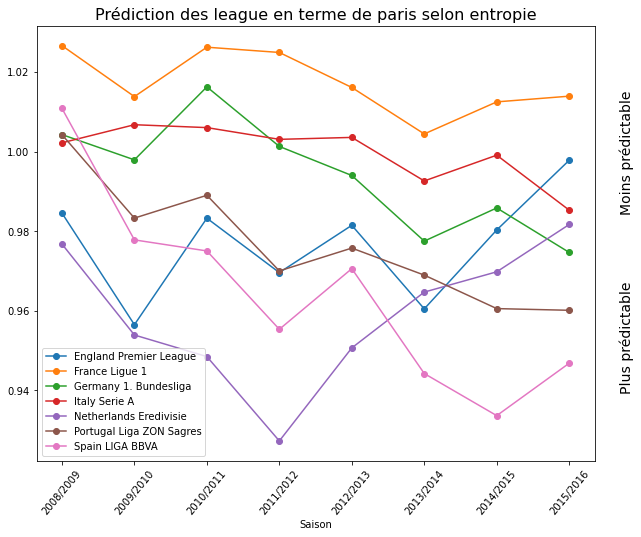

In [28]:
plot(entropy_means_league_season,'entropie')

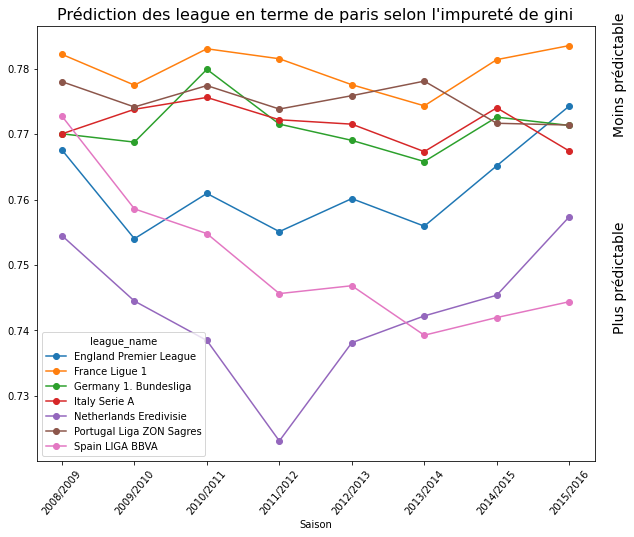

In [29]:
plot(gini_means_league_season,'gini')

Globalement, sur les deux métriques le classement des ligues les plus prédictable restent les même.
Les deux indices qui mesure le "désordre" d'un jeu de donnée ont des valeurs globalement haute
Gini(league) > 0.7
Entropy(league) > 0.93

In [30]:
def rankLeague(entropy_means_league_season, gini_means_league_season,metric='entropy'):
    rank_league = {}
    col_league = entropy_means_league_season.columns
    means_league = [] 
    for c in col_league :
        if metric == 'entropy' :
            metric_mean =  entropy_means_league_season[c].mean()
        if metric == 'gini':
            metric_mean =  gini_means_league_season[c].mean()
        rank_league.update({c:metric_mean})  
    rank_league = sorted(rank_league.items(), key=lambda x: x[1])
    cpt = 1
    print("Classement des ligue les plus prédictables aux moins prédictables toutes époque confondues")
    for key,value in rank_league :
        print(str(cpt)+ ") "+str(key))
        cpt += 1
    return rank_league
rank_league_entropy = rankLeague(entropy_means_league_season,gini_means_league_season)
rank_league_gini = rankLeague(entropy_means_league_season,gini_means_league_season,metric='gini')
rank_league_gini

Classement des ligue les plus prédictables aux moins prédictables toutes époque confondues
1) Netherlands Eredivisie
2) Spain LIGA BBVA
3) Portugal Liga ZON Sagres
4) England Premier League
5) Germany 1. Bundesliga
6) Italy Serie A
7) France Ligue 1
Classement des ligue les plus prédictables aux moins prédictables toutes époque confondues
1) Netherlands Eredivisie
2) Spain LIGA BBVA
3) England Premier League
4) Germany 1. Bundesliga
5) Italy Serie A
6) Portugal Liga ZON Sagres
7) France Ligue 1


[('Netherlands Eredivisie', 0.7429453209040424),
 ('Spain LIGA BBVA', 0.750519512855031),
 ('England Premier League', 0.7616424712140861),
 ('Germany 1. Bundesliga', 0.7711307637243301),
 ('Italy Serie A', 0.7714919496352688),
 ('Portugal Liga ZON Sagres', 0.7750565682398246),
 ('France Ligue 1', 0.7801320996966143)]

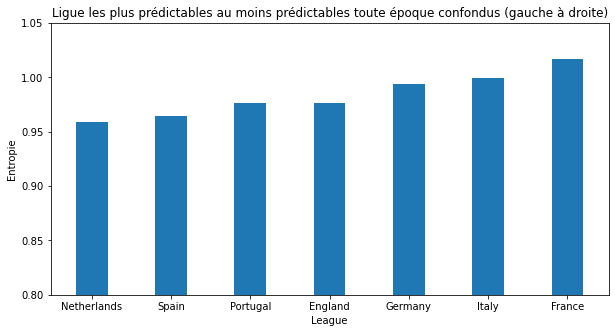

In [31]:
league_key = []
league_val = []
for key,value in rank_league_entropy :
    league_key.append(key.split()[0])
    league_val.append(value)
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(league_key,league_val ,width = 0.4) 
  
plt.xlabel("League") 
axes = plt.gca()
axes.set_ylim([0.8,1.05])
plt.ylabel("Entropie") 
plt.title("Ligue les plus prédictables au moins prédictables toute époque confondus (gauche à droite)") 
plt.show() 

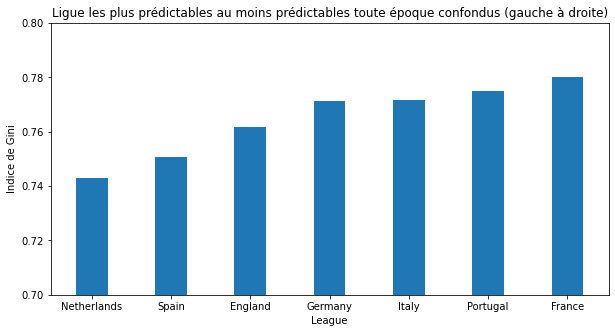

In [32]:
league_key = []
league_val = []
for key,value in rank_league_gini :
    league_key.append(key.split()[0])
    league_val.append(value)

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(league_key,league_val ,width = 0.4) 
  
plt.xlabel("League") 
axes = plt.gca()
axes.set_ylim([0.7,0.80])
plt.ylabel("Indice de Gini") 
plt.title("Ligue les plus prédictables au moins prédictables toute époque confondus (gauche à droite)") 
plt.show() 

On note que la Hollande et les Pays bas ne sont pas déclassé selon la metrique utilisée. Le Portugal lui arrive en troisieme position avec l'entropie alors qu'il est avant dernier dans le classement avec l'indice de Gini
On remarque que la France reste la ligue la moins previsible.

## Réponse a la sous question 

Pour répondre à la question, est ce que des ligues sont plus prévisibles que d'autres sur les paris sportifs ? 
La réponse est oui même si par nos deux métriques nous trouvons des valeurs d'entropie et de gini relativement haute qui témoigne du "désordre" des données et donc de la complexité de la chance d'avoir fait une bonne prédiction.
Les deux ligues les plus prédictables sont la ligue hollandaise et espagnol
La ligue la moins prédictable est la ligue française

# 2) Quelle est la representation des ligues dans les top equipes les plus prédictables ?

In [33]:
team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [34]:
match.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A,league_name,entropy,gini
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,1.29,5.5,11.00,England Premier League,0.738980,0.452778
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0,1.20,6.5,15.00,England Premier League,0.641186,0.374708
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,5.50,3.6,1.67,England Premier League,0.975928,0.970490
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,1.91,3.4,4.20,England Premier League,1.039730,0.754081
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,1.91,3.4,4.33,England Premier League,1.036584,0.750717


In [35]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [36]:
match['home_team'] = match['home_team_api_id'].apply(lambda x : team[team['team_api_id'] == x].team_long_name.values[0])
match['away_team'] = match['away_team_api_id'].apply(lambda x : team[team['team_api_id'] == x].team_long_name.values[0])
match['country'] = match['country_id'].apply(lambda x : countries[countries['id'] == x].name.values[0])

In [37]:
league_value = match['league_name'].unique()
countries_value = match['country'].unique()
season_value = match['season'].unique() 

In [38]:
countries_value

array(['England', 'France', 'Germany', 'Italy', 'Netherlands', 'Portugal',
       'Spain'], dtype=object)

In [39]:
league_value

array(['England Premier League', 'France Ligue 1',
       'Germany 1. Bundesliga', 'Italy Serie A', 'Netherlands Eredivisie',
       'Portugal Liga ZON Sagres', 'Spain LIGA BBVA'], dtype=object)

In [40]:
season_value

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [41]:
def team_predict(match,league_value,season_value):
    d = []
    df_league_team_season = []
    # Pour chaque league
    for l in league_value :
        # Pour chaque saison
        for s in season_value : 
            df_league_team_season.append(match[ ( match['league_name'] == l ) & (match['season'] == s) ])
            # on recupere les equipes de la ligue
            team_season = match[ ( match['league_name'] == l ) & (match['season'] == s) ]['home_team'].unique()
            match_season = match[ ( match['league_name'] == l ) & (match['season'] == s) ]
            # Pour chaque equipe
            #print(team_season)
            for ekip in team_season : 
                entropy_equip = float(match_season[(['home_team'] == ekip ) | (match_season['away_team'] == ekip) ]['entropy'].mean())
                gini_equip = float(match_season[(match_season['home_team'] == ekip) | (match_season['away_team'] == ekip) ]['gini'].mean())
                d.append({
                            'League': l,
                            'Team': ekip,
                            'Season': s,
                            'entropy':  entropy_equip,
                            'gini' : gini_equip
                        })

    return pd.DataFrame(d)
        

In [42]:
d = team_predict(match,league_value,season_value)
d.shape

(1060, 5)

In [43]:
print(d.head(100))

                    League               Team     Season   entropy      gini
0   England Premier League  Manchester United  2008/2009  0.943305  0.714776
1   England Premier League            Arsenal  2008/2009  0.996960  0.746184
2   England Premier League         Sunderland  2008/2009  0.970833  0.776997
3   England Premier League    West Ham United  2008/2009  0.991150  0.779474
4   England Premier League        Aston Villa  2008/2009  1.035199  0.778353
..                     ...                ...        ...       ...       ...
95  England Premier League  Tottenham Hotspur  2012/2013  1.040718  0.763319
96  England Premier League        Aston Villa  2012/2013  0.937973  0.766834
97  England Premier League            Chelsea  2012/2013  1.028543  0.741515
98  England Premier League        Southampton  2012/2013  0.944649  0.759672
99  England Premier League         Stoke City  2012/2013  0.979518  0.770967

[100 rows x 5 columns]


In [44]:
def rankTeam(d, season,nfirst):
    df = d[d['Season'] == season]
    df = df.groupby(['Team','League','Season']).agg({'entropy': {lambda x: x.mean()},
                                                         'gini':{lambda x: x.mean()},
                                                       },axis=1)
    df.columns = df.columns.droplevel(1)
    small_df = df.nsmallest(nfirst, 'entropy')
    small_df = small_df.reset_index()
    return small_df

sr = d['Season'].unique()
season_rank_team = []
for s in sr: 
    season_rank_team.append(rankTeam(d,s,20))

In [45]:
top_team = season_rank_team[0]
for df in range(1,len(season_rank_team)):
                top_team = pd.concat([top_team,season_rank_team[df]])
top_team['Country'] = top_team['League'].apply(lambda x : x.split()[0])

In [46]:
top_team

,Team,League,Season,entropy,gini,Country
0,FC Volendam,Netherlands Eredivisie,2008/2009,0.835105,0.733413,Netherlands
1,De Graafschap,Netherlands Eredivisie,2008/2009,0.886308,0.754026,Netherlands
2,FC Energie Cottbus,Germany 1. Bundesliga,2008/2009,0.893372,0.747231,Germany
3,ADO Den Haag,Netherlands Eredivisie,2008/2009,0.894987,0.745058,Netherlands
4,Stoke City,England Premier League,2008/2009,0.908132,0.758103,England
...,...,...,...,...,...,...
15,Borussia Dortmund,Germany 1. Bundesliga,2015/2016,0.911551,0.705851,Germany
16,Carpi,Italy Serie A,2015/2016,0.914134,0.755672,Italy
17,Aston Villa,England Premier League,2015/2016,0.914290,0.772457,England
18,Granada CF,Spain LIGA BBVA,2015/2016,0.914531,0.752897,Spain


In [47]:
groups = top_team.groupby("League")

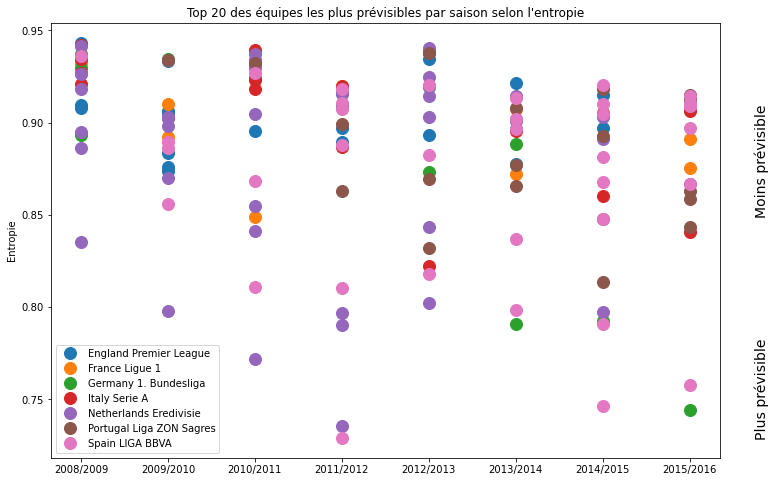

In [48]:
# Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Season'], group['entropy'], marker='o', linestyle='', ms=12, label=name)
ax.legend()

# Annotation 
plt.ylabel("Entropie")
ax.annotate('Moins prévisible', xy=(7.75, 0.85), annotation_clip=False,fontsize=14,rotation='vertical')
ax.annotate('Plus prévisible', xy=(7.75, 0.73), annotation_clip=False,fontsize=14,rotation='vertical')
ax.title.set_text('Top 20 des équipes les plus prévisibles par saison selon l\'entropie')
plt.show()

Vu le résultat des graphiques précédent, on pouvait avoir l'intuition que les équipes des ligues les plus prévisibles aient une fréquence plus élevé dans ce classement des dix équipes sur chaque saison. On observe bien une majorité de points rose et violet qui appartiennent aux deux ligues les plus prédictables : espagnole et hollandaise

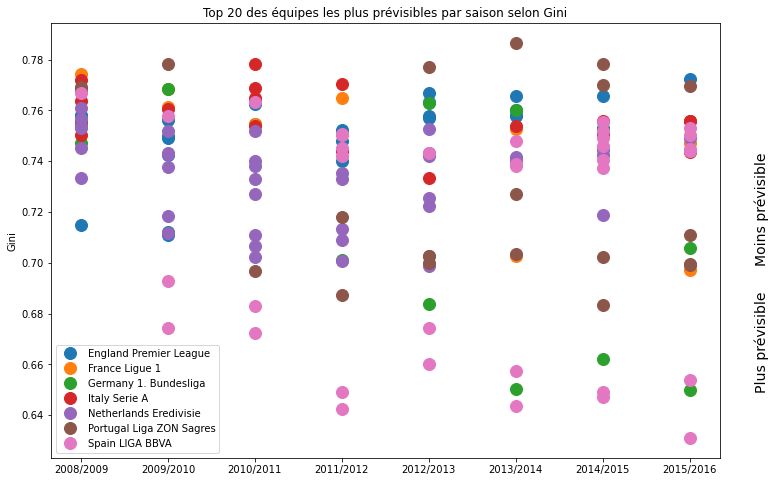

In [49]:
# Plot
fig, ax = plt.subplots(figsize=(12,8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Season'], group['gini'], marker='o', linestyle='', ms=12, label=name)
ax.legend()

# Annotation 
plt.ylabel("Gini")
ax.annotate('Moins prévisible', xy=(7.75, 0.7), annotation_clip=False,fontsize=14,rotation='vertical')
ax.annotate('Plus prévisible', xy=(7.75, 0.65), annotation_clip=False,fontsize=14,rotation='vertical')
ax.title.set_text('Top 20 des équipes les plus prévisibles par saison selon Gini')
plt.show()

Même observation que pour l'entropie

<AxesSubplot:ylabel='League'>

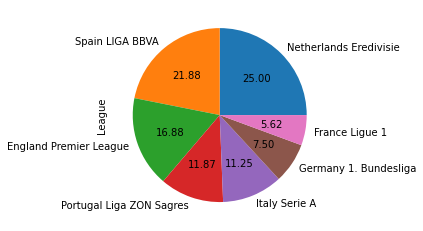

In [50]:
top_team['League'].value_counts().plot(kind='pie',autopct='%.2f')

Les top  équipes sont représentatifs des résultat qu'on à trouvé à la question précédente, c'est à dire une part importante d'équipe qui font partie de la ligue espagnol et hollandaise qui compte au moins le double d'équipe par rapport aux autres

## Réponse a la sous question  

A la question quelle est la representation des ligues dans les top equipes les plus prédictables, nous trouvons que la ligue espagnole et la ligue hollandaise domine le classement avec presque 1/2 des équipes à eux deux.

# Conclusion

A la question quelles ligues sont les plus prédictables : nous pouvons répondre la ligue espagnole et la ligue hollandaise sont les ligues les plus prévisibles car elles se retrouvent dans le top des ligues prédictable à chaque saison. De plus, à eux d'eux,  elles constituent presque la moitié des équipe les prédictables dans le top 20 des équipes les plus prédictables toutes époques confondues. Cependant, la ligue française reste la pire en terme de prédiction.